# Final Project
## 2015 Canadian Election Federal Election Sentiment Analysis

In [45]:
#Declare necesasry imports

import numpy as np
import pandas as pd
import string
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Ingest the data
classified_txt = 'classified_tweets.txt'
unclassified_txt = 'unclassified_tweets.txt'

classified_df = pd.read_csv(classified_txt, header=None, names=['Tweet_data'])

In [28]:
classified_df.head()

,Tweet_data
0,0 @switchfoot http://twitpic.com/2y1zl - Awww ...
1,0 is upset that he can't update his Facebook b...
2,0 @Kenichan I dived many times for the ball. M...
3,0 my whole body feels itchy and like its on fire
4,0 @nationwideclass no it's not behaving at al...


In [29]:
# Look at length of data set
len(classified_df)

200000

In [30]:
# Look at a sample record
print(classified_df.loc[0][0])

0 @switchfoot http://twitpic.com/2y1zl - Awww  that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


**Data Cleaning** 

We will strip the first character of each string which is a 0 (negative sentiment) or a 4 (positive sentiment) in this data set and store in a new column in the df

In [103]:
# Utility fucntion for pulling sentiment, and removing the value from original tweet string

def sentiment(tweet):
    sent = tweet[0]
    return sent
    
def strip(tweet):
    if tweet[0] is '0':
        new = tweet.strip('0')
    elif tweet[0] is '4':
        new = tweet.strip('4')
    return new

def clean_text(tweet):
    ''' Takes in text and removes any words in the useless list'''
    useless = nltk.corpus.stopwords.words("english") + list(string.punctuation)
    t = tweet.split()
    new_tweet = ""
    for word in t:
        if not word in useless:
            new_tweet = new_tweet + word + " "
    return new_tweet
    
    

In [36]:
# Use Apply method to utilize utility function over the data frame

classified_df['Sentiment'] = classified_df['Tweet_data'].apply(sentiment)
classified_df['Tweet'] = classified_df['Tweet_data'].apply(strip)

In [93]:
classified_df.head()

,Tweet_data,Sentiment,Tweet
0,0 @switchfoot http://twitpic.com/2y1zl - Awww ...,0,@switchfoot http://twitpic.com/yzl Awww that's...
1,0 is upset that he can't update his Facebook b...,0,upset can't update Facebook texting it... migh...
2,0 @Kenichan I dived many times for the ball. M...,0,@Kenichan I dived many times ball. Managed sav...
3,0 my whole body feels itchy and like its on fire,0,whole body feels itchy like fire
4,0 @nationwideclass no it's not behaving at al...,0,@nationwideclass behaving all. i'm mad. here? ...


In [43]:
# Code to remove any unnecessary numbers in the strings as they can compromize tokens
classified_df['Tweet'] = classified_df['Tweet'].str.replace('(\d)','')

In [79]:
(classified_df['Tweet'][0])

" @switchfoot http://twitpic.com/yzl - Awww  that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [80]:
# Remove any of the useless words from our tweets
#clean_text(classified_df['Tweet'][0],useless_words) 

classified_df['Tweet'] = classified_df['Tweet'].apply(clean_text)
classified_df['Tweet']

0         @switchfoot http://twitpic.com/yzl Awww that's...
1         upset can't update Facebook texting it... migh...
2         @Kenichan I dived many times ball. Managed sav...
3                         whole body feels itchy like fire 
4         @nationwideclass behaving all. i'm mad. here? ...
5                                     @Kwesidei whole crew 
6                                                 Need hug 
7         @LOLTrish hey long time see! Yes.. Rains bit b...
8                                          @Tatiana_K nope 
9                                      @twittera que muera 
10                      spring break plain city... snowing 
11                                       I re-pierced ears 
12        @caregiving I bear watch it. And I thought UA ...
13        @octolinz It counts idk I either. never talk a...
14        @smarrison would've first gun. really though z...
15        @iamjazzyfizzle I wish I got watch you!! I mis...
16        Hollis' death scene hurt sever

I will be using the **Term Frequency Inverse Document frequecy vectorizer** offered through sci-kit learn that helps to tokenize the strings data (puts more emphasis on words that unique), and generate feature vectors for training of the classification model

In [232]:
# Using Term Frequencies
# TfidVectorizer  = CountVectorizer + Tfidtransfirner

# Code to generate feature vectors from given classified tweets corpus
# This will generate a feature vectors to be used for training and classification of given tweet texts

# Split a training set and a test set (70:30)
data_train, data_test, target_train, target_test = train_test_split(classified_df['Tweet'], classified_df['Sentiment'], test_size=0.3)

# Create training features for the model, Vectorizer also removes list of stop words from features
vectorizer = TfidfVectorizer(stop_words="english")
training_features = vectorizer.fit_transform(data_train)

#Creating testing feature vectors based on the features fitted from the training data set
testing_features = vectorizer.transform(data_test)

#vectorizer.get_feature_names()

Train the **Naive Bayes Classifier** on this test set

In [86]:
# Train Classifier based on Multinomial Bayes Theoram 

classifier_bayes = MultinomialNB(alpha = 1)
# Enter the feature vectors and the target sentiment values
classifier_bayes.fit(training_features,target_train)


MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

Check the acuracy of the classifier on the test set through its in built scoreing fucntion

In [87]:
# Test the accuracy of the classifer on the test data

classifier_bayes.score(testing_features, target_test)

0.7466833333333334

Ingest the Unclassified tweets in a dataframe

In [108]:
unclassified_df = pd.read_csv(unclassified_txt, header=None, names=['Tweet'])
unclassified_df.head()

,Tweet
0,living the dream. #cameraman #camera #camerace...
1,justin #trudeau's reasons for thanksgiving. to...
2,@themadape butt…..butt…..we’re allergic to l...
3,2 massive explosions at peace march in #turkey...
4,#mulcair suggests there’s bad blood between hi...


In [113]:
# Code to remove any unnecessary numbers in the strings as they can compromize tokens
unclassified_df['Tweet'] = unclassified_df['Tweet'].astype('str')
unclassified_df['Tweet'] = unclassified_df['Tweet'].str.replace('(\d)','')
unclassified_df['Tweet'] = unclassified_df['Tweet'].apply(clean_text)

unclassified_df['Tweet']

0       living dream. #cameraman #camera #cameraceptio...
1       justin #trudeau's reasons thanksgiving. today'...
2       @themadape butt…..butt…..we’re allergic latex!...
3       massive explosions peace march #turkey. killed...
4       #mulcair suggests there’s bad blood #trudeau w...
5       #polqc se sort de la marde avec #harper et prê...
6       harper gave $m help countries' get right wing ...
7                                     tommy taylor added 
8                         @justintrudeau? @thomasmulcair 
9                                   tracy retweeted tsec 
10      icymi: @lylegreg predicting @liberal_party win...
11      cbc.ca/news/canada/ottawa/canada-election--ott...
12                                                #pjnet 
13      cop told sex assault prevention students wear ...
14                                          @billhillier 
15                                        it. pls canada 
16                   #readychange #ndp #tmpm fb.me/nxiue 
17      believ

In [115]:
# Generate feaure vectors for the unclassified tweets based on trained data features 


unclassified_features = vectorizer.transform(unclassified_df['Tweet'])
# Get predictions Bayes
unclassified_tweet_sentiments_bayes = classifier_bayes.predict(unclassified_features)


In [125]:
# Store the sentiment in a new column, NOTE 0 is negative, 4 is positive
unclassified_df['Sentiment'] = unclassified_tweet_sentiments_bayes

In [127]:
unclassified_df.head()

,Tweet,Sentiment
0,living dream. #cameraman #camera #cameraceptio...,0
1,justin #trudeau's reasons thanksgiving. today'...,4
2,@themadape butt…..butt…..we’re allergic latex!...,0
3,massive explosions peace march #turkey. killed...,4
4,#mulcair suggests there’s bad blood #trudeau w...,4


Need code to classify the tweets for the different major political parties, in this case there are 4 major political party categories I will consider in the Canadian Context ***'Liberal', 'Conservative', 'NDP', Others'***
As this data needs to be assigned to a party, a simple word frequency counter algorithm will be used to assign to each party

In [133]:
dic = { i:i**2 for i in range(0,10)}
1 in dic.keys()

True

In [134]:
# Preporcessor and tokenizer code

preprocessor = vectorizer.build_preprocessor()
tokenizer = vectorizer.build_tokenizer()

# Defining the bag_of_words function
def bag_of_words(tw):
    '''(str) -> dict
    Input: a string tw (a tweet line)
    Output: a python dictionary 
    '''
      
    unigram_ls = tokenizer(preprocessor(tw))
    
    #Create an empty dictionary
    bag_words = {}
    #Run through tokenized unigram list
    for item in unigram_ls:
        #Check to see if item is already a key in the dictionary
        if item in bag_words.keys():
            #If item already in dictionary as a key, increment key value by 1
            bag_words[item] += 1
        
        else:
            #For item in list, add item as key,set key value to 1
            bag_words[item] = 1
           
    return bag_words



# Defining the party function
def party(tw):
    '''
    (str) -> str
    Input: a string tw (a tweet line)
    Output: a string determining the political part for a tweet 
    
    >>> party("living the dream. #tommulcair instagram.com/p/8up9qekxw/")
    
    'NDP'
    
    4 possible categories are : 'Liberal', 'Conservative', 'NDP', Others'
    
    #tags Classifications used for each political party
    Liberal: #realchage, #justin, #trudeau, #liberal, #justintrudeau, #lpc #liberalparty
    
    Conservative: #harper, #cpc, #conservative, #stephen, #stephenharper, #conservativeparty
    
    NDP: #tommulclair, #tom, #mulclair, #ndp, #thomasmulcair, #ready4change
    
    Other: #greenparty, #green, #canadiangreens, #gpc, #elizabethmay
    
    The function picks up on the above defined key hashtags. These hashtags were selected to be most relevant for 
    each of the polictical parties after a brief survey of tweets pertaining to the canadaian election.
    The function creates a dictionary keeping track of the frequency of key words pertaining to each political party and
    outputs the party name with the highest number of keyword hits
    
    '''
    #create a bag of words dictionary of the inputed tweet
    bag_words = bag_of_words(tw)
    
    #Create lists holding the hashtag words for each of the parties
    liberal_ls = ['realchange','justin','trudeau','liberal','justintrudeau','lpc','teamtrudeau','liberalparty','sophie','trudeau4pm','justin4pm']
    conservative_ls = ['harper','cpc','conservative','stephen','stephenharper', 'conservativeparty','harper4pm']
    ndp_ls = ['tommulcair','tom','mulcair','ndp','thomasmulcair','ready4change','mulcair4pm']
    other_ls = ['greenparty', 'green', 'canadiangreens', 'gpc', 'elizabethmay']
    
    #create intial party dictionary to hold nubmer of times (count) a party's associated keyword occurs
    party_dict = {'NDP':0, 'Liberal':0, 'Conservative':0,'Others':0}
    
    for key in bag_words:
        #Check if the key is a keyword in each of the political parties lists
               
        if key in liberal_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Liberal'] += bag_words[key]
        
        if key in conservative_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Conservative'] += bag_words[key]
        
        if key in ndp_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['NDP'] += bag_words[key]
        
        if key in other_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Others'] += bag_words[key]
            
    #create a new string party variable with default other
    #and update its value based on the party with the most frequency of keywords/hashtags
    party_name = 'Others'
    for key in party_dict:
        if party_dict[key] > party_dict[party_name]:
            #update party name value
            party_name = key
    
    
    return party_name
    


In [136]:
# Run our Party assignement function through the data set
unclassified_df['Party'] = unclassified_df['Tweet'].apply(party)
unclassified_df.head(10)

,Tweet,Sentiment,Party
0,living dream. #cameraman #camera #cameraceptio...,0,NDP
1,justin #trudeau's reasons thanksgiving. today'...,4,Liberal
2,@themadape butt…..butt…..we’re allergic latex!...,0,Others
3,massive explosions peace march #turkey. killed...,4,Others
4,#mulcair suggests there’s bad blood #trudeau w...,4,NDP
5,#polqc se sort de la marde avec #harper et prê...,4,Liberal
6,harper gave $m help countries' get right wing ...,4,Conservative
7,tommy taylor added,4,Others
8,@justintrudeau? @thomasmulcair,4,NDP
9,tracy retweeted tsec,4,Others


In [155]:
unclassified_df['Count'] = 1
unclassified_df.head(10)

,Tweet,Sentiment,Party,Count
0,living dream. #cameraman #camera #cameraceptio...,0,NDP,1
1,justin #trudeau's reasons thanksgiving. today'...,4,Liberal,1
2,@themadape butt…..butt…..we’re allergic latex!...,0,Others,1
3,massive explosions peace march #turkey. killed...,4,Others,1
4,#mulcair suggests there’s bad blood #trudeau w...,4,NDP,1
5,#polqc se sort de la marde avec #harper et prê...,4,Liberal,1
6,harper gave $m help countries' get right wing ...,4,Conservative,1
7,tommy taylor added,4,Others,1
8,@justintrudeau? @thomasmulcair,4,NDP,1
9,tracy retweeted tsec,4,Others,1


In [195]:
party_db = unclassified_df[['Party','Sentiment','Count']]
print(party_db.groupby('Party').describe())

               Count                                   
               count mean  std  min  25%  50%  75%  max
Party                                                  
Conservative   413.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Liberal        565.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
NDP            396.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Others        1639.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [213]:
pvt_party = party_db.pivot_table(values='Count',index='Sentiment',columns='Party',aggfunc=np.sum)
pvt_party

Party,Conservative,Liberal,NDP,Others
Sentiment,,,,
0,206,113,88,330
4,207,452,308,1309


In [214]:
# Renaming the Indices to reflect positive and negative statements
pvt_party = pvt_party.rename(index={'0':'Negative', '4':'Positive'})
pvt_party.transpose()

Sentiment,Negative,Positive
Party,,
Conservative,206,207
Liberal,113,452
NDP,88,308
Others,330,1309


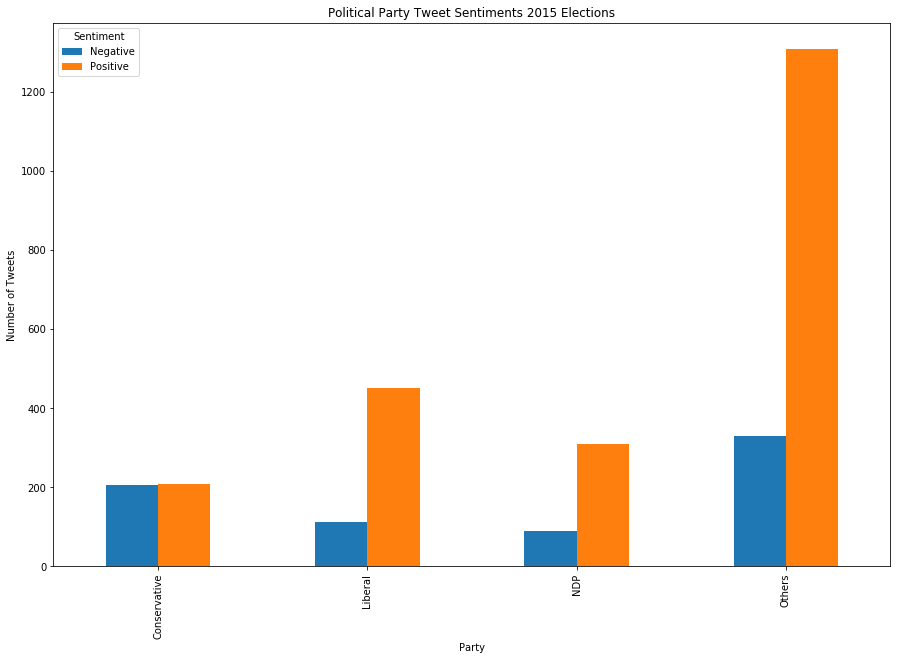

In [228]:
pvt_party.transpose().plot.bar(figsize=(15,10))
#label the figure
plt.title('Political Party Tweet Sentiments 2015 Elections')
plt.ylabel('Number of Tweets')
plt.savefig('Politiacal Sentiments 2015 Elections.png', dpi=100)

In [226]:
pvt_party3 = pvt_party.transpose()
#conservative_sum = pvt_party2.loc['Conservative']['Negative'] + pvt_party2.loc['Conservative']['Positive']

#conservative_sum
pvt_party3

Sentiment,Negative,Positive
Party,,
Conservative,206,207
Liberal,113,452
NDP,88,308
Others,330,1309


In [217]:
pvt_party3.sum(axis=1)
csum = pvt_party3.sum(axis=1).loc['Conservative']
lsum = pvt_party3.sum(axis=1).loc['Liberal']
nsum = pvt_party3.sum(axis=1).loc['NDP']
osum = pvt_party3.sum(axis=1).loc['Others']

In [224]:
pvt_partyp =pvt_party3.copy()
pvt_partyp

Sentiment,Negative,Positive
Party,,
Conservative,206,207
Liberal,113,452
NDP,88,308
Others,330,1309


In [227]:
pvt_partyp.loc['Conservative']['Negative'] = (pvt_party3.loc['Conservative']['Negative']/csum)*100.0
pvt_partyp.loc['Conservative']['Positive'] = (pvt_party3.loc['Conservative']['Positive']/csum)*100.0
pvt_partyp.loc['Liberal']['Negative'] = (pvt_party3.loc['Liberal']['Negative']/lsum)*100.0
pvt_partyp.loc['Liberal']['Positive'] = (pvt_party3.loc['Liberal']['Positive']/lsum)*100.0
pvt_partyp.loc['NDP']['Negative'] = (pvt_party3.loc['NDP']['Negative']/nsum)*100.0
pvt_partyp.loc['NDP']['Positive'] = (pvt_party3.loc['NDP']['Positive']/nsum)*100.0
pvt_partyp.loc['Others']['Negative'] = (pvt_party3.loc['Others']['Negative']/osum)*100.0
pvt_partyp.loc['Others']['Positive'] = (pvt_party3.loc['Others']['Positive']/osum)*100.0

pvt_partyp

Sentiment,Negative,Positive
Party,,
Conservative,49,50
Liberal,20,80
NDP,22,77
Others,20,79


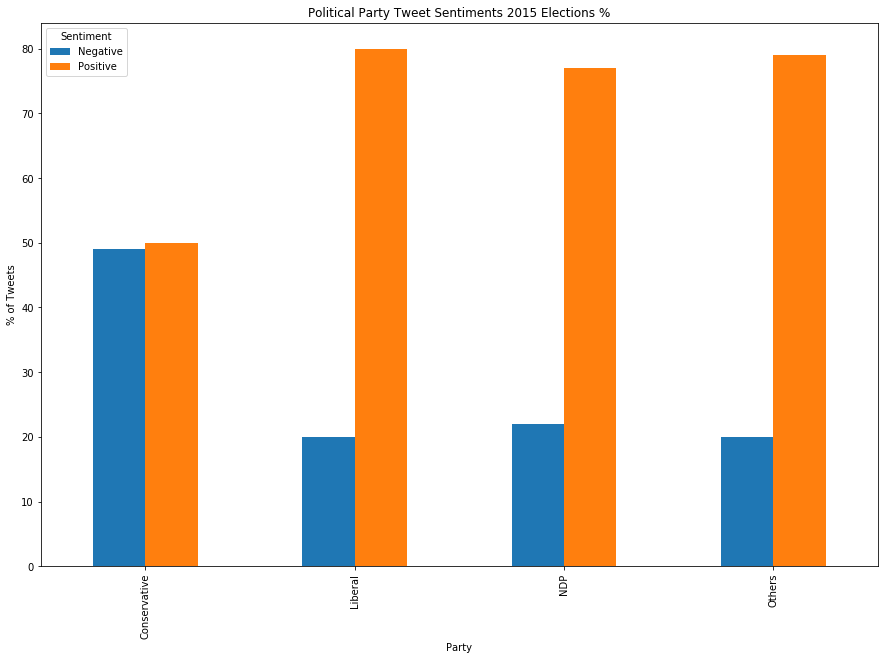

In [231]:
pvt_partyp.plot.bar(figsize=(15,10))
#label the figure
plt.title('Political Party Tweet Sentiments 2015 Elections %')
plt.ylabel('% of Tweets')
plt.savefig('Politiacal Sentiments 2015 Elections %.png', dpi=100)